## EARTHQUAKE DAMAGE 
 - https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading values
earthquake_train = pd.read_csv("train_values.csv")

In [3]:
earthquake_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# loading labels
earthquake_labels = pd.read_csv("train_labels.csv")

In [5]:
earthquake_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
earthquake_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [7]:
# checking for null values and type of data
earthquake_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
# merging tables values and labels
earthquake_data =pd.merge(earthquake_train,earthquake_labels, how = "right", on = "building_id")

In [9]:
earthquake_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [10]:
# checking categorical columns - it seems that they are nominal 
earthquake_data.describe(include = "object")

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [11]:
# checking numeric columns
earthquake_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [12]:
earthquake_data.shape

(260601, 40)

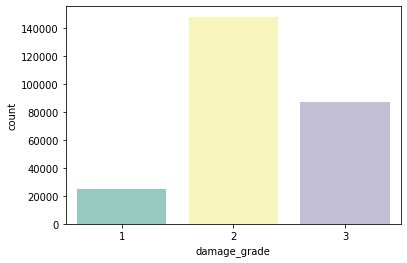

In [13]:
# check distribution of the data
sns.countplot(earthquake_data['damage_grade'], palette='Set3')

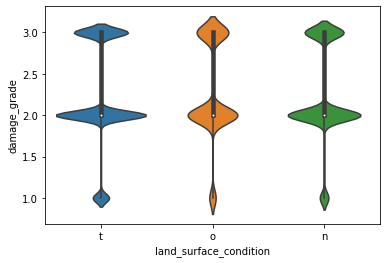

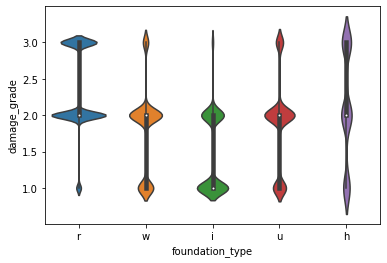

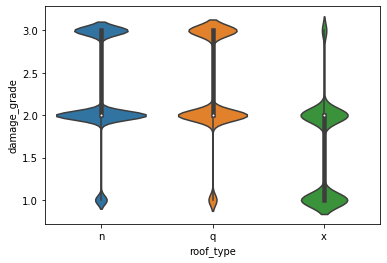

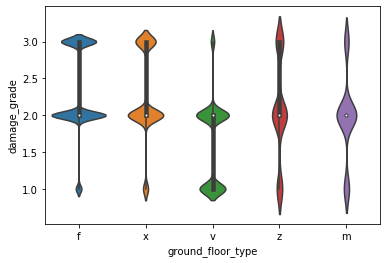

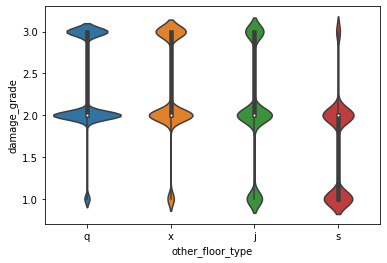

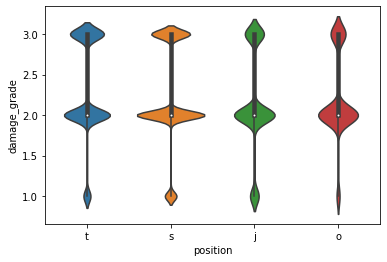

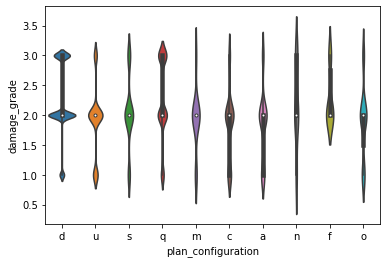

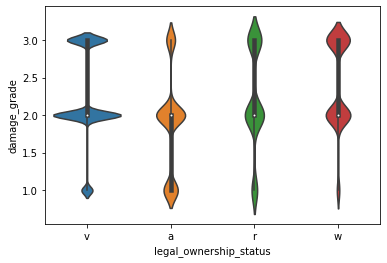

In [14]:
# violin plot to check categorical data distribution per damage_grade
list_col = ["land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type",
            "position","plan_configuration","legal_ownership_status"]
for col in list_col:
    plt.figure()
    ax = sns.violinplot(x=earthquake_data[col], y="damage_grade", data=earthquake_data)
    
# land-surface-condition "t" and "n" have more damage classified as a grade 2
#foundation_type "i" has more  damage classified as damage 1 and 2 - maybe is a more solid foundation for earthquakes? 
# foundation type "h" and "r" have more damage classified as a grade 3 than the other 3 types. 
# roof_type "x" has less damage classified as a grade 3 

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


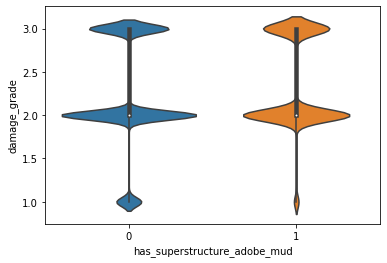

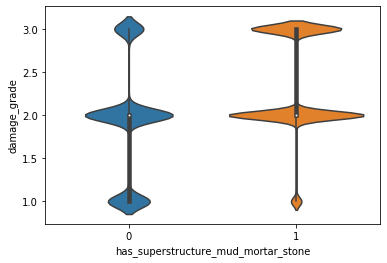

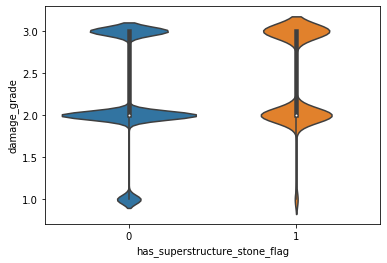

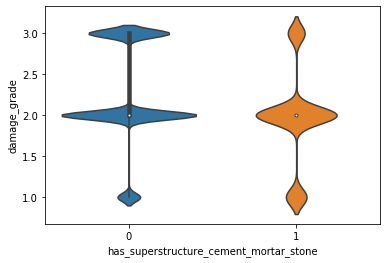

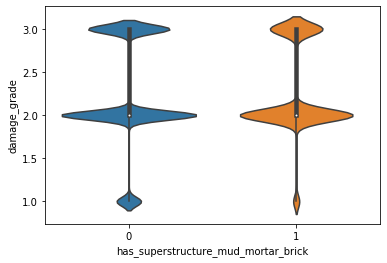

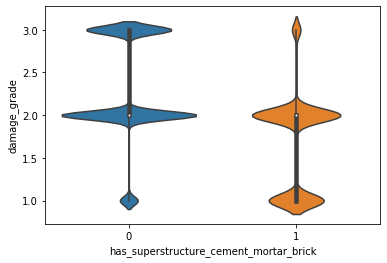

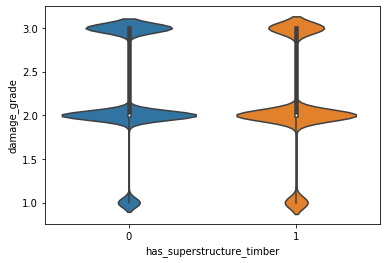

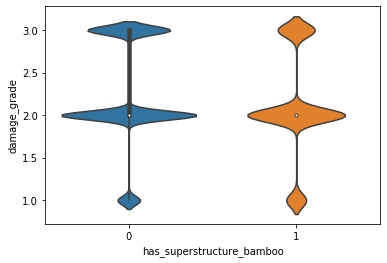

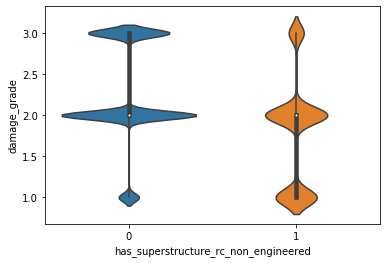

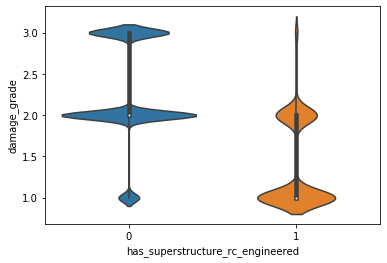

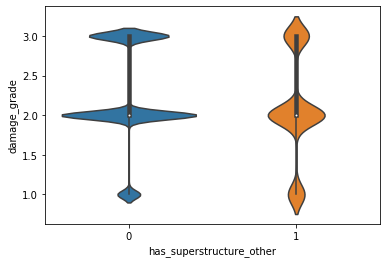

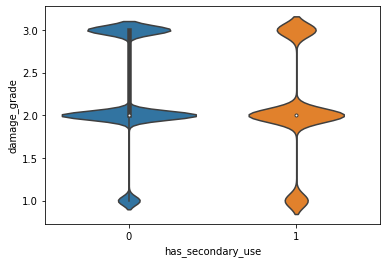

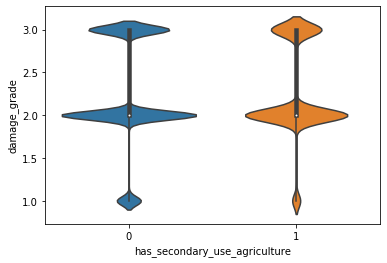

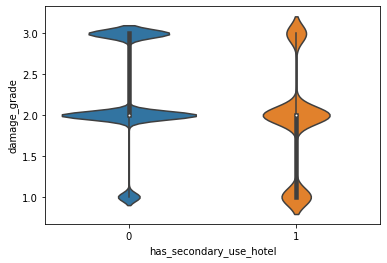

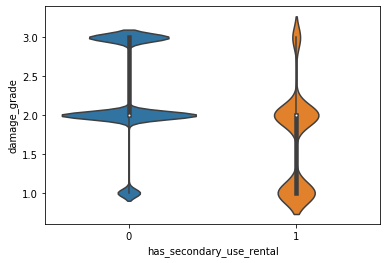

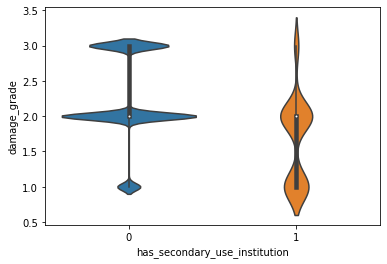

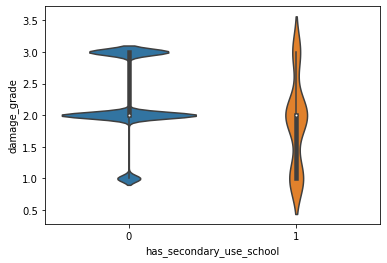

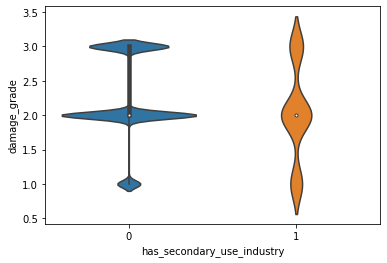

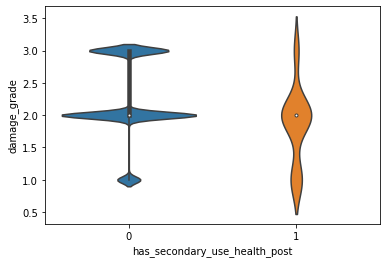

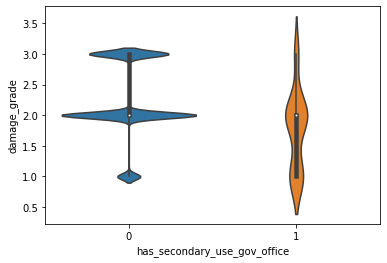

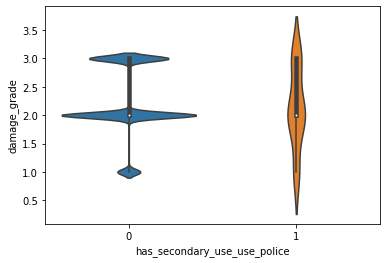

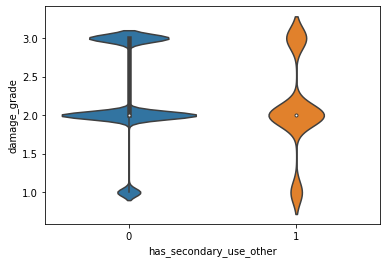

In [15]:
# violin plot to check binary data distribution per damage_grade
list_col = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
        'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']
for col in list_col:
    plt.figure()
    ax = sns.violinplot(x=earthquake_data[col], y="damage_grade", data=earthquake_data)

In [16]:
earthquake_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [17]:
# plotting numeric columns
def plot_feature_distribution(df1, df2,df3, label1, label2,label3, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(3,2,figsize=(16,12))

    for feature in features:
        i += 1
        plt.subplot(3,2,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        sns.distplot(df3[feature], hist=False,label=label3)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=10, pad=-3)
        plt.tick_params(axis='y', labelsize=10)
       
    plt.show();

<Figure size 432x288 with 0 Axes>

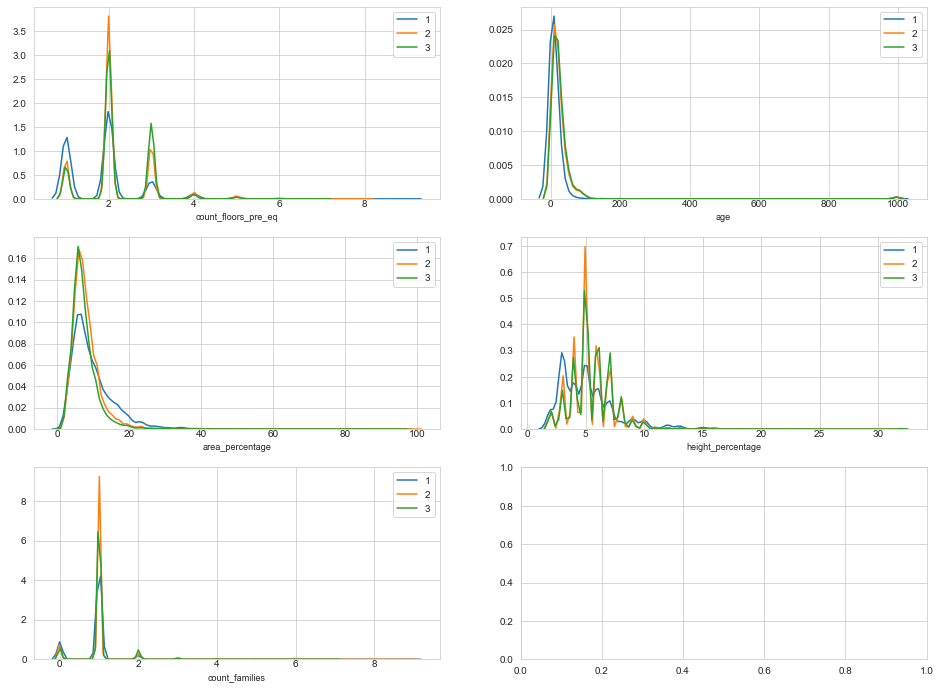

In [18]:
features = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families']
t0 = earthquake_data.loc[earthquake_data['damage_grade'] == 1]
t1 = earthquake_data.loc[earthquake_data['damage_grade'] == 2]
t2 = earthquake_data.loc[earthquake_data['damage_grade'] == 3]

plot_feature_distribution(t0, t1,t2 ,'1', '2','3', features)
# We can see that number of floors higher than 2 have a higher percentage of damage grade as 2 and 3

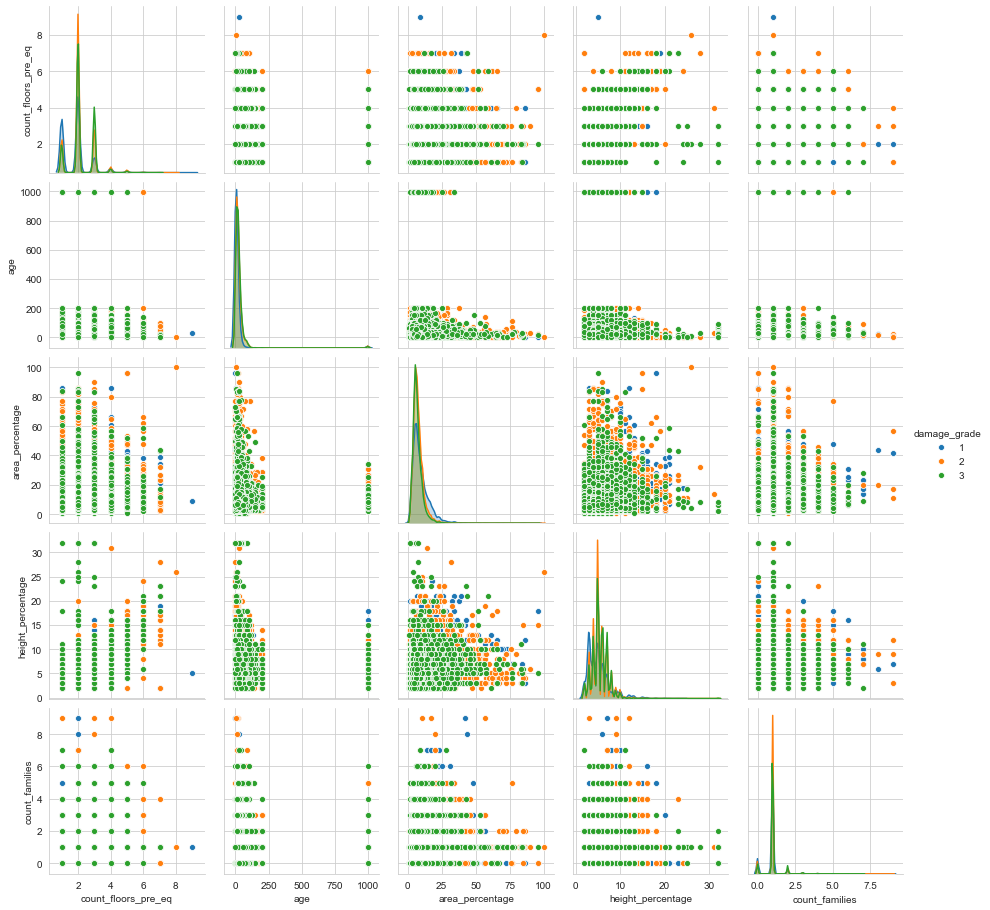

In [19]:
g = sns.pairplot(earthquake_data, vars = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families'], hue ="damage_grade")

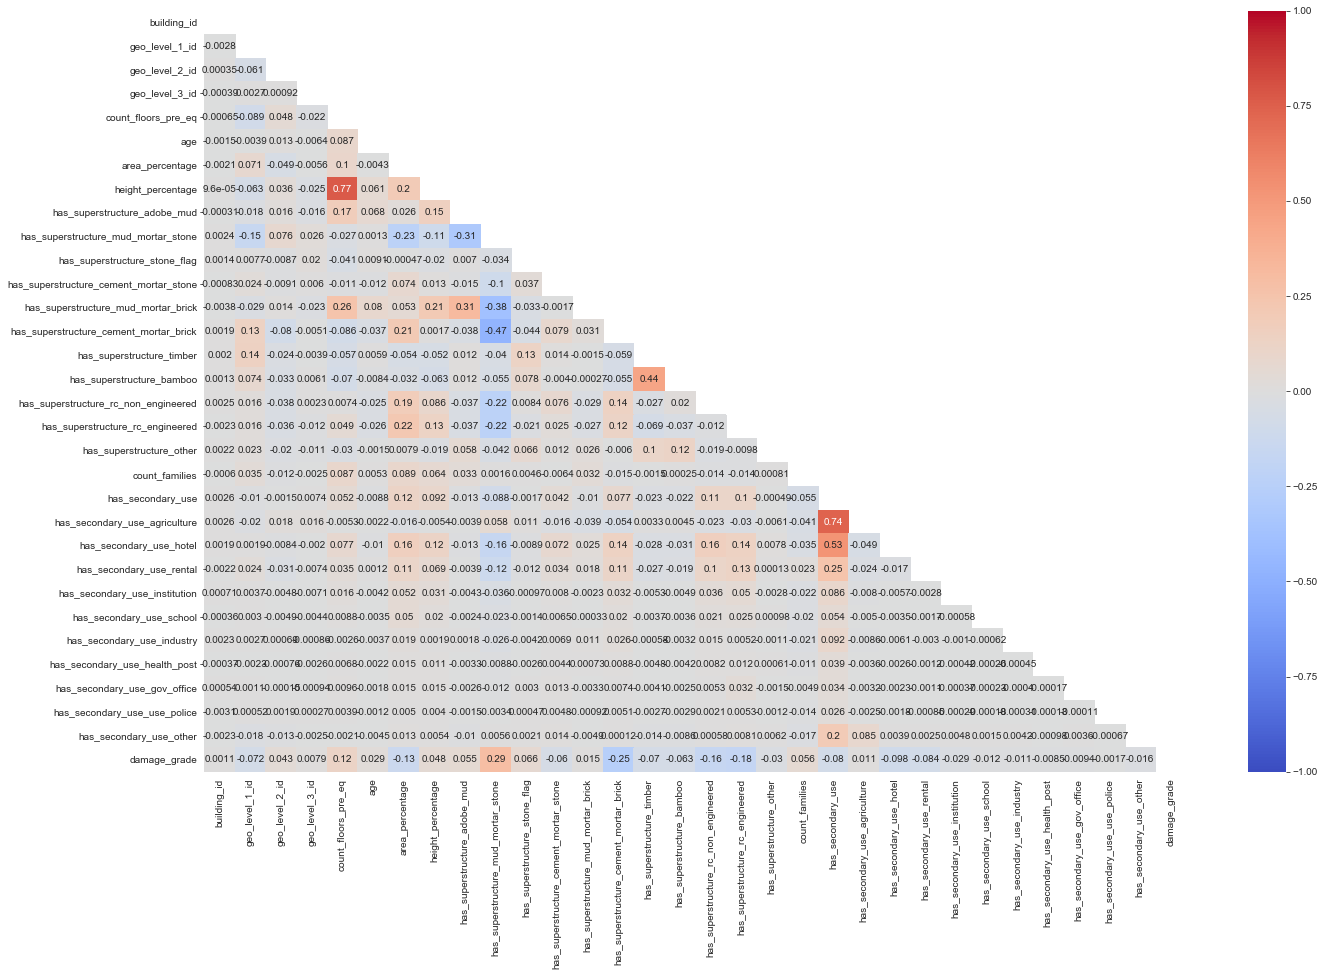

In [20]:
# checking correlation
plt.figure(figsize = (22.0,14.0))
matrix = np.triu(earthquake_data.corr())
sns.heatmap(earthquake_data.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()


In [21]:
# encoding the categorical variables 
earthquake_data_encoded = pd.get_dummies(earthquake_data, drop_first = True)

In [22]:
earthquake_data_encoded.shape

(260601, 62)

In [23]:
earthquake_data_encoded.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# getting the target column
target = earthquake_data_encoded["damage_grade"]

In [25]:
earthquake_data_encoded.drop("damage_grade", axis = 1, inplace = True)

In [26]:
earthquake_data_encoded.shape

(260601, 61)

In [27]:
earthquake_data_encoded["damage_grade"] = target

In [28]:
earthquake_data_encoded.shape

(260601, 62)

In [29]:
earthquake_data_encoded.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,damage_grade
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,1,0,3
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,1,0,2
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,1,0,3
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,1,0,2
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,1,0,3


### MODEL

In [30]:
# splitting the data
from sklearn.model_selection import train_test_split

In [241]:
X = earthquake_data_encoded.iloc[:,1:-1]
y = earthquake_data_encoded.iloc[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [32]:
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import re
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [34]:
# Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#  model score
print(f'Score on train: {LR_model.score(X_train, y_train)}')
print(f'Score on test: {LR_model.score(X_test, y_test)}')

Score on train: 0.5694742900997698
Score on test: 0.566297653536962


In [36]:
y_pred = LR_model.predict(X_test)

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[   13,  5005,     3],
       [    3, 29480,    48],
       [    0, 17546,    23]], dtype=int64)

In [37]:
df_con_mat = pd.DataFrame(con_mat, columns = ['Predicted 1','Predicted 2', 'Predicted 3'],
                 index = ['True 1','True 2', 'True 3'])

df_con_mat
# the model is predicting almost every entry as a damage grade 2 - imbalance problem maybe?

,Predicted 1,Predicted 2,Predicted 3
True 1,13,5005,3
True 2,3,29480,48
True 3,0,17546,23


In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.566297653536962

In [50]:
# SMOTE the training data
from imblearn.over_sampling import SMOTE

In [51]:
from collections import Counter

In [52]:
Counter(y_train)

Counter({2: 118728, 3: 69649, 1: 20103})

In [53]:
Counter(y_test)

Counter({3: 17569, 1: 5021, 2: 29531})

In [54]:
sm = SMOTE(random_state=1)
X_balanced, y_balanced = sm.fit_resample(X_train_scaled, y_train)

In [68]:
Counter(y_balanced)

Counter({2: 118728, 3: 118728, 1: 118728})

In [55]:
#Logistic Regression 
LR_model = LogisticRegression()
LR_model.fit(X_balanced, y_balanced)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print("train score",LR_model.score(X_balanced ,y_balanced))
print("test score", LR_model.score(X_test, y_test))

train score 0.5808879680165308
test score 0.24320331536232997


In [67]:
y_pred = LR_model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')
# SMOTE didn't help 

0.24320331536232997

In [40]:
# Checking other models performance

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# non-esemble models
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('decision_tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))

              
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f  " % (name, cv_results.mean())
    print(msg)


LR 0.592277  
decision_tree 0.657353  
KNN 0.644896  
SGD 0.576722  


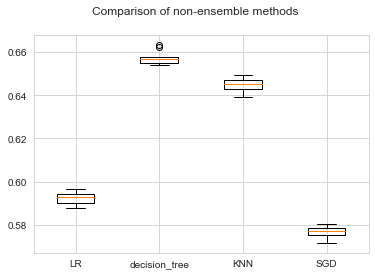

In [44]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of non-ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [46]:
#Tunning the decision tree
max_depth= [1, 3, 5, 7, 9, 15, 19, 21]
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(f'test score is :  {grid_result.score(X_test_scaled, y_test)}')

Best: 0.698854 using {'max_depth': 15}
test score is :  0.6976842347614205


In [47]:
best_grid = grid_result.best_estimator_
predictions = best_grid.predict(X_test_scaled)

In [49]:
from sklearn import metrics

print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.61      0.42      0.50      5021
           2       0.70      0.83      0.76     29531
           3       0.72      0.55      0.62     17569

    accuracy                           0.70     52121
   macro avg       0.68      0.60      0.63     52121
weighted avg       0.70      0.70      0.69     52121



In [58]:
f1_score(y_test,predictions, average='micro')
# f1 score improved from the first logistic model

0.6976842347614205

In [59]:
# esembles models

AB: 0.646427 (0.003290)
GBM: 0.682377 (0.002291)
RF: 0.713594 (0.001137)
XG: 0.674151 (0.002258)


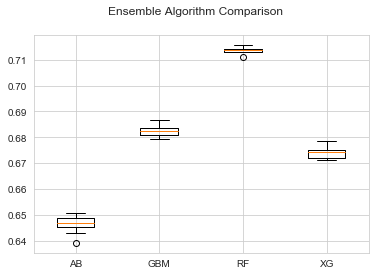

In [60]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('XG', XGBClassifier()))
results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [69]:
# Tunning Random Forest using Randomized search
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [71]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 290.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 1835.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [72]:
best_grid = rf_random.best_estimator_
predictions = rf_random.predict(X_test_scaled)

In [194]:
best_grid

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.70      0.47      0.56      5021
           2       0.72      0.85      0.78     29531
           3       0.75      0.59      0.66     17569

    accuracy                           0.73     52121
   macro avg       0.72      0.64      0.67     52121
weighted avg       0.73      0.73      0.72     52121



In [74]:
f1_score(y_test,predictions, average='micro')
# best f1 score so far

0.7273651695094108

In [ ]:
# neural network

In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [94]:
num_class = len(np.unique(y_train.values))
num_class

3

In [124]:
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder
#encode class values for neural net
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_Y)

In [163]:
dummy_y[0:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [183]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128,input_dim = X_train_scaled.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(32, activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, activation='softmax'))

# Compile the network :
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 99        
Total params: 77,955
Trainable params: 77,955
Non-trainable params: 0
_________________________________________________________________


In [185]:
NN_model.fit(X_train_scaled, dummy_y, epochs = 20, batch_size = 4)


Epoch 1/20
208480/208480 [==============================] - 65s 313us/step - loss: 0.7199 - acc: 0.6613
Epoch 2/20
208480/208480 [==============================] - 69s 333us/step - loss: 0.7191 - acc: 0.6620
Epoch 3/20
208480/208480 [==============================] - 67s 321us/step - loss: 0.7175 - acc: 0.6653
Epoch 4/20
208480/208480 [==============================] - 67s 321us/step - loss: 0.7162 - acc: 0.6650
Epoch 5/20
208480/208480 [==============================] - 74s 355us/step - loss: 0.7170 - acc: 0.6668
Epoch 6/20
208480/208480 [==============================] - 61s 294us/step - loss: 0.7207 - acc: 0.6670
Epoch 7/20
208480/208480 [==============================] - 78s 372us/step - loss: 0.7175 - acc: 0.6676
Epoch 8/20
208480/208480 [==============================] - 57s 273us/step - loss: 0.7148 - acc: 0.6685
Epoch 9/20
208480/208480 [==============================] - 75s 359us/step - loss: 0.7208 - acc: 0.6687
Epoch 10/20
208480/208480 [==============================] - 76s

In [186]:
nn_predictions = NN_model.predict(X_test_scaled)

In [187]:
nn_predictions.shape

(52121, 3)

In [188]:
# decoding the results from the NN model
def decode(results_nn):
    return np.argmax(results_nn)

In [189]:
decoded = []
for i in range(nn_predictions.shape[0]):
    decoded_results = decode(nn_predictions[i])
    decoded.append(decoded_results)

In [190]:
# returning results to classes 1,2,3
predictions_results = []

for i in range(len(decoded)):
    if decoded[i] == 0:
      predictions_results.append(1)
    elif decoded[i] == 1:
      predictions_results.append(2)
    elif decoded[i] ==2:
      predictions_results.append(3)

In [191]:
decoded[1:20]

[1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1]

In [192]:
predictions_results[1:20]

[2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2]

In [193]:
# f1 score for submission 
f1_score(y_test,predictions_results, average='micro')

0.6480881026841389

In [336]:
# lightGBM model

In [318]:
import lightgbm as lgbm

In [306]:
earthquake_data_encoded.loc[(earthquake_data_encoded["damage_grade"] == 1), "damage_grade"] = 0
earthquake_data_encoded.loc[(earthquake_data_encoded["damage_grade"] == 2), "damage_grade"] = 1
earthquake_data_encoded.loc[(earthquake_data_encoded["damage_grade"] == 3), "damage_grade"] = 2

In [308]:
X = earthquake_data_encoded.iloc[:,1:-1]
y = earthquake_data_encoded.iloc[:,-1]

In [309]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [310]:
my_scaler = StandardScaler()
X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.transform(X_test)

In [332]:
#Converting the dataset in proper LGB format
train_data_lgbm = lgbm.Dataset(X_train_scaled, label=y_train)
test_data_lgbm = lgbm.Dataset(X_test_scaled, label=y_test)

In [342]:
def lgbm_f1_score(y_pred,data):
    y_true = data.get_label().astype('int')
    y_pred =y_pred.reshape((3,-1)).argmax(axis=0) 
    y_pred=np.round(y_pred)
    return 'f1', f1_score(y_true, y_pred,average='micro'), True

In [403]:
#setting up the parameters
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 20,
    'is_unbalanced':True,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7}

clf=lgbm.train(params,
                       train_data_lgbm,
                       valid_sets=[test_data_lgbm,train_data_lgbm],
                       valid_names=['test','train'],
                       feval=lgb_f1_score,
                       num_boost_round=15000,
                       verbose_eval=500,
                       early_stopping_rounds=300)

Training until validation scores don't improve for 300 rounds
[500]	train's multi_logloss: 0.628318	train's f1: 0.719484	test's multi_logloss: 0.641392	test's f1: 0.708716
[1000]	train's multi_logloss: 0.595846	train's f1: 0.737438	test's multi_logloss: 0.61976	test's f1: 0.721226
[1500]	train's multi_logloss: 0.574578	train's f1: 0.748091	test's multi_logloss: 0.608423	test's f1: 0.727902
[2000]	train's multi_logloss: 0.558041	train's f1: 0.756293	test's multi_logloss: 0.60113	test's f1: 0.731011
[2500]	train's multi_logloss: 0.543533	train's f1: 0.764131	test's multi_logloss: 0.595284	test's f1: 0.734541
[3000]	train's multi_logloss: 0.53048	train's f1: 0.770299	test's multi_logloss: 0.59024	test's f1: 0.737419
[3500]	train's multi_logloss: 0.519714	train's f1: 0.775705	test's multi_logloss: 0.58731	test's f1: 0.738167
[4000]	train's multi_logloss: 0.509769	train's f1: 0.781197	test's multi_logloss: 0.584426	test's f1: 0.739875
Early stopping, best iteration is:
[4092]	train's multi_

In [404]:
#prediction on the test dataset
y_pred_1=clf.predict(X_test_scaled)
#printing the predictions
y_pred_1

array([[8.29354636e-04, 9.07790027e-02, 9.08391643e-01],
       [2.69820234e-01, 6.14297783e-01, 1.15881983e-01],
       [4.33760575e-02, 7.91223577e-01, 1.65400365e-01],
       ...,
       [1.33692201e-02, 9.42314744e-01, 4.43160356e-02],
       [4.91299078e-03, 6.98722627e-01, 2.96364382e-01],
       [1.26461274e-02, 4.94545228e-01, 4.92808645e-01]])

In [405]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in y_pred_1]

In [406]:
f1_score(y_test,y_pred_1, average='micro')

0.7400280117419081

In [ ]:
# TEST SET

In [363]:
earthquake_test = pd.read_csv("test_values.csv")

In [364]:
earthquake_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [365]:
# encoding the categorical variables 
earthquake_test_encoded = pd.get_dummies(earthquake_test, drop_first = True)

In [370]:
test_encoded = earthquake_test_encoded.copy()
test_encoded = test_encoded.iloc[:,1:]
test_encoded.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,17,596,11307,3,20,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,6,141,11987,2,25,13,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,22,19,10044,2,5,4,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,26,39,633,1,0,19,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,17,289,7970,3,15,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [371]:
# scaling the test set
my_scaler = StandardScaler()
test_scaled = my_scaler.fit_transform(test_encoded)

In [256]:
# best model clf

In [392]:
y_predicted = clf.predict(test_scaled)

In [393]:
#argmax() method 
y_predicted = [np.argmax(line) for line in y_predicted]

In [394]:
test = pd.DataFrame(y_predicted)

In [395]:
test.columns = ["Results"]

In [396]:
test.head()

,Results
0,2
1,1
2,1
3,0
4,2


In [397]:
# converting to the 1,2,3 classes
test.loc[(test["Results"] == 0), "damage_grade"] = 1
test.loc[(test["Results"] == 1), "damage_grade"] = 2
test.loc[(test["Results"] == 2), "damage_grade"] = 3

In [398]:
test.head()

,Results,damage_grade
0,2,3.0
1,1,2.0
2,1,2.0
3,0,1.0
4,2,3.0


In [386]:
test.to_csv("results.csv")